# HW 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [2]:
diamonds_df = pd.read_csv('diamonds.csv')

In [3]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


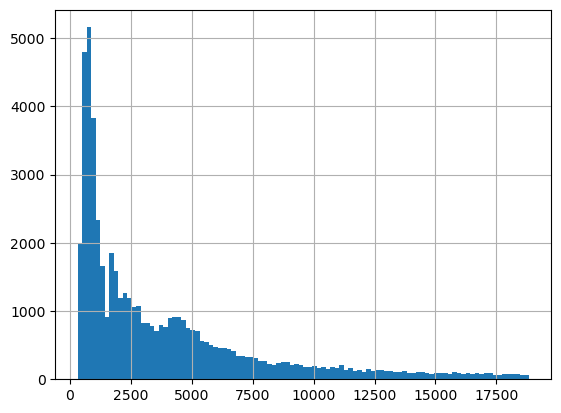

In [4]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid()
plt.show()

# Подготовка данных

In [5]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [6]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [7]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [8]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [11]:
reg = LinearRegression().fit(X_train, y_train)

In [12]:
y_pred = reg.predict(X_test)

In [13]:
score = r2_score(y_pred, y_test)

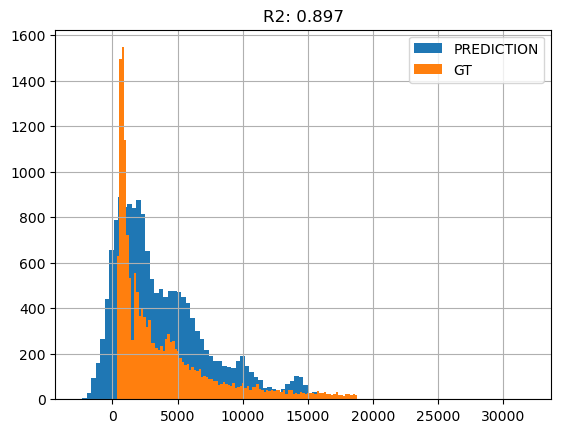

In [14]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid()
plt.show()

In [15]:
reg.intercept_

array([2986.54927596])

In [16]:
reg.coef_

array([[51148.25187875,   472.47472887, -1974.69216261,  3530.7720608 ,
        -2905.6766965 , -1449.95988869, -8721.95669848,  1098.0443115 ,
         -324.00144698]])

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [17]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(self, learning_rate=0.01, n_iter=1000):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        # в начале биас, потом коэффициенты
        self._params = np.array([])
        self.loss_history = []
        pass

    def __loss(self, X: np.ndarray, y: np.ndarray) -> np.float64:
        pred = self.predict(X)
        diff = pred - y
        return np.mean(diff**2, dtype=np.float64)

    def __grad(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        size = X.shape[0]
        pred = self.predict(X)
        diff = pred - y
        bias_col = np.ones((X.shape[0],))[:, np.newaxis]
        X_with_bias = np.hstack((bias_col, X))
        return (2 / size) * (X_with_bias.T @ diff)

    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        y = y.ravel()
        self._params = np.zeros((X.shape[1]+1,))
        for _ in range(self.n_iter):
            grad = self.__grad(X, y)
            self._params = self._params - (self.learning_rate * grad)
            self.loss_history.append(self.__loss(X, y))
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        bias_col = np.ones((X.shape[0],))[:, np.newaxis]
        X_with_bias = np.hstack((bias_col, X))
        return X_with_bias @ self._params

    def get_params(self):
        """
        Возвращает обученные параметры модели
        """
        return self._params


Обучим нашу модель

In [18]:
test = LinearRegressorGD(learning_rate=0.1, n_iter=1000).fit(X_train, y_train)

История лосса по эпохам

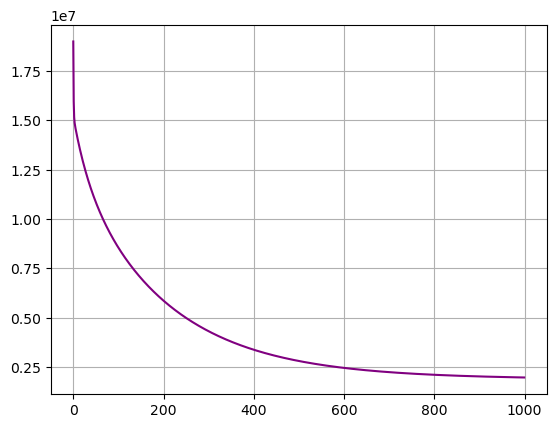

In [19]:
plt.plot(list(range(len(test.loss_history))), test.loss_history, color="purple")
plt.grid()
plt.show()

Строим ту же диаграмму для сравнения

In [20]:
y_pred = test.predict(X_test)

In [21]:
score = r2_score(y_pred, y_test)

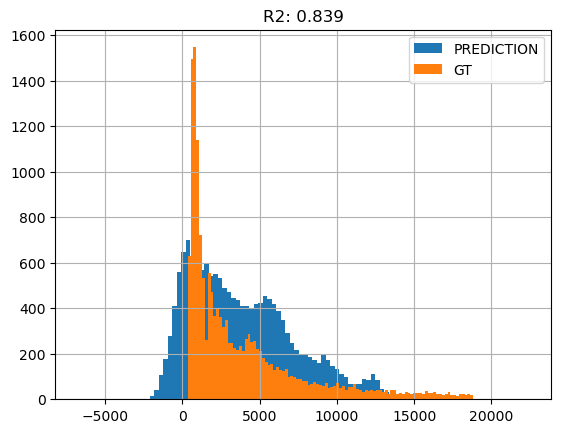

In [22]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid()
plt.show()

обученные параметры

In [23]:
test.get_params()

array([-6694.22778897, 20604.59521546,   187.77976205, -1450.59726513,
        3100.1686686 , -3135.6326418 , -1519.92593026, 16028.03419693,
        2922.21394935,  3326.49445197])

# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации нужно использовать Softmax

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [24]:
class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=100):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.layers = []
        self.biases = []
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.forward_history = []
        self.w_grad = []
        self.b_grad = []
        self.loss_history = []

    def __loss(self, pred: np.ndarray, y: np.ndarray) -> np.float64:
        diff = pred - y
        return np.mean(diff**2, dtype=np.float64)
    
    def loss_grad(self, pred: np.ndarray, y: np.ndarray) -> np.ndarray:
        diff = pred - y
        return 2 * diff
    
    def sigmoid(self, X: np.ndarray):
        return 1 / (1 + np.exp(-X))
    
    def sigmoid_derivative(self, X: np.ndarray):
        return X * (1 - X)
    
    def initialize_matrices(self, X: np.ndarray, y: np.ndarray):
        self.layers = []
        self.biases = []
        input_n = X.shape[1]
        output_n = y.shape[1]
        # input -> first hidden
        self.layers.append(
            np.random.normal(0, 0.1, (input_n, self.hidden_layer_sizes[0]))
        )
        self.biases.append(np.zeros((self.hidden_layer_sizes[0],)))
        # other hidden layers
        for i in range(len(self.hidden_layer_sizes)-1):
            self.layers.append(
                np.random.normal(0, 0.1, (
                    self.hidden_layer_sizes[i],
                    self.hidden_layer_sizes[i+1]
                ))
            )
            self.biases.append(np.zeros((self.hidden_layer_sizes[i+1],)))
        # last hiddent -> output
        self.layers.append(
            np.random.normal(0, 0.1, (self.hidden_layer_sizes[-1], output_n))
        )
        self.biases.append(np.zeros((output_n,)))

    def forward(self, X: np.ndarray):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        result = X.copy()
        self.forward_history = []
        self.forward_history.append(result)

        # hidden layers (biased linear transform -> sigmoid)
        for w, b in zip(self.layers[:-1], self.biases[:-1]):
            result = self.sigmoid(result @ w + b)
            self.forward_history.append(result)

        # output layer (biased linear transform)
        result = result @ self.layers[-1] + self.biases[-1]
        self.forward_history.append(result)
            
        return result

    def backward(self, X, y):
        """
        Реализация backward pass

        Возвращает:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        self.b_grad = []
        self.w_grad = []
        grad = self.loss_grad(self.forward_history[-1], y)

        # output layer
        # bias
        self.b_grad.append(np.mean(grad, axis=0))
        # matrix
        self.w_grad.append(self.forward_history[-2].T @ grad / X.shape[0])
        grad = grad @ self.layers[-1].T
        
        # other hidden layers
        for i in range(len(self.forward_history)-2, 0, -1):
            # sigmoid
            grad = self.sigmoid_derivative(self.forward_history[i]) * grad
            # bias
            self.b_grad.append(np.mean(grad, axis=0))
            # matrix
            self.w_grad.append(self.forward_history[i - 1].T @ grad / X.shape[0])
            grad = grad @ self.layers[i - 1].T
        return X, y
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        self.initialize_matrices(X, y)
        for _ in range(self.n_iter):
            # forward pass
            self.forward(X)
            # backward pass
            self.backward(X, y)
            # params update
            self.b_grad = self.b_grad[::-1]
            self.w_grad = self.w_grad[::-1]
            for i in range(len(self.layers)):
                self.layers[i] = self.layers[i] - self.learning_rate * self.w_grad[i]
                self.biases[i] = self.biases[i] - self.learning_rate * self.b_grad[i]
            self.loss_history.append(self.__loss(self.forward_history[-1], y))
        return self

    def predict(self, X: np.ndarray):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        result = X.copy()
        # hidden layers (biased linear transform -> sigmoid)
        for w, b in zip(self.layers[:-1], self.biases[:-1]):
            result = self.sigmoid(result @ w + b)
        # output layer (biased linear transform)
        result = result @ self.layers[-1] + self.biases[-1]
        return result


Обучим нашу модель

In [25]:
test = MLPRegressor(hidden_layer_sizes=(100, 50, 10), learning_rate=0.01, n_iter=100).fit(X_train, y_train)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_20864\778110189.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


Посмотрим на лосс по эпохам

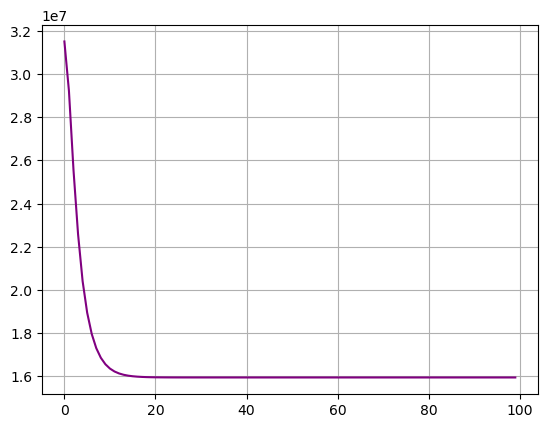

In [26]:
plt.plot(list(range(len(test.loss_history))), test.loss_history, color="purple")
plt.grid()
plt.show()

последние 20 лоссов

In [27]:
test.loss_history[-20:]

[15923426.455161672,
 15923426.45516073,
 15923426.455159828,
 15923426.455158956,
 15923426.4551581,
 15923426.455157256,
 15923426.455156418,
 15923426.45515559,
 15923426.455154762,
 15923426.455153942,
 15923426.455153123,
 15923426.455152305,
 15923426.455151487,
 15923426.455150673,
 15923426.455149861,
 15923426.455149047,
 15923426.455148239,
 15923426.455147427,
 15923426.455146614,
 15923426.455145808]

Числа очень большие, но это видимо так и должно быть. Внизу сравнение с библиотечной реализацией

In [29]:
from sklearn.neural_network import MLPRegressor as sck

test2 = sck((100, 50, 10), activation="logistic", max_iter=100).fit(X_train, y_train)

d:\Programming\Anaconda\envs\ds\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Programming\Anaconda\envs\ds\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Посмотрим лосс у неё

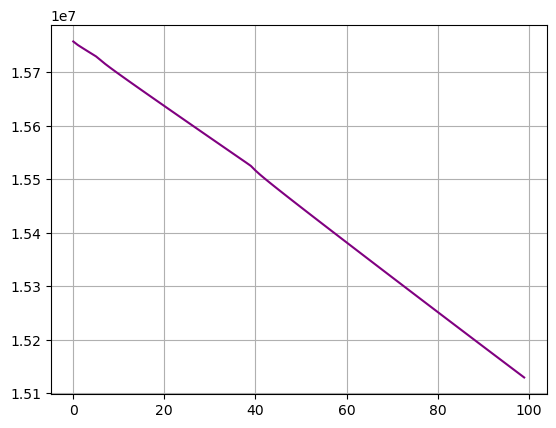

In [30]:
plt.plot(list(range(len(test2.loss_curve_))), test2.loss_curve_, color="purple")
plt.grid()
plt.show()

In [31]:
test2.loss_curve_[:-20]

[15757050.458239459,
 15750474.239734603,
 15745047.261321176,
 15739716.997963915,
 15734433.492735943,
 15729173.37903772,
 15722213.609662905,
 15715184.313336313,
 15708761.407677522,
 15702517.69990569,
 15696370.208255332,
 15690284.155172935,
 15684241.515969673,
 15678227.555992508,
 15672236.503262145,
 15666262.309879329,
 15660304.132702172,
 15654359.454627013,
 15648424.031638956,
 15642497.042394381,
 15636576.029093178,
 15630662.725242218,
 15624755.205061162,
 15618851.393298514,
 15612953.069531525,
 15607059.460005546,
 15601169.789353574,
 15595281.948790124,
 15589393.695703346,
 15583510.228493595,
 15577630.972314991,
 15571757.605040738,
 15565886.506249694,
 15560017.838300768,
 15554149.830285225,
 15548281.065623991,
 15542417.071054308,
 15536558.008331165,
 15530701.378621895,
 15524727.516877681,
 15516191.761713183,
 15508539.583562793,
 15501403.249154001,
 15494457.667057388,
 15487619.800079828,
 15480854.707232663,
 15474137.593832703,
 15467456.48040

Кривая выглядит немного иначе из-за более продвинутого оптимизатора в библиотечной реализации. Но проблема та же, лосс остаётся таким же.

На и на последок диаграмма

In [32]:
y_pred = test.predict(X_test)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_20864\778110189.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


In [33]:
score = r2_score(y_pred, y_test)

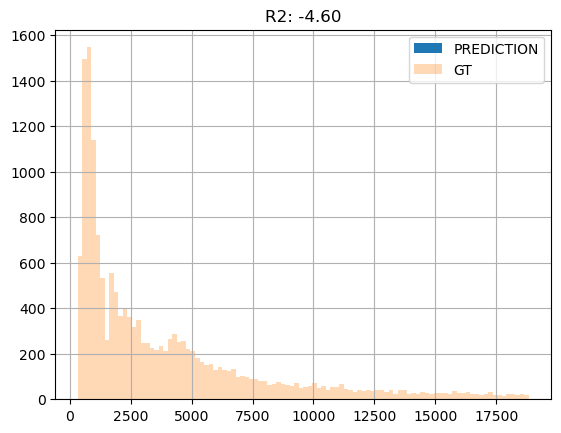

In [ ]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT', alpha=0.3)
plt.legend()
plt.grid()
plt.show()

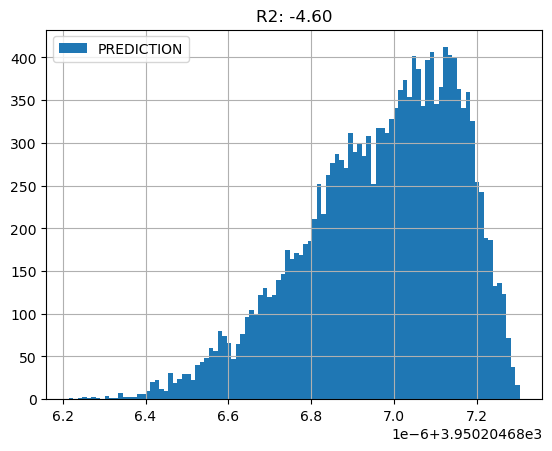

In [35]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.legend()
plt.grid()
plt.show()